In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

### Introducción
##### En enero de 2019 los subsidios al transporte público de pasajeros fueron suspendidos por la Nación, trasladando esta "carga" a las provincias o jurisdicciones en las que operan las empresas de transporte. El transporte urbano de pasajeros constituye uno de los sistemas de movilidad dentro de las ciudades, transportando personas desde diferentes lugares hacia sus destinos. En este sentido, dada la accesibilidad y popularidad del transporte urbano, este es utilizado por grandes cantidades de personas, quienes eligen los colectivos como medio de transporte. Pero este medio de transporte tiene un costo, y ese costo es el resultado, entre otras cosas, de los subsidios aplicados en materia de gasoil como de compensaciones tarifarias.
##### En el siguiente notebook evaluamos los subsidios al transporte urbano de pasajeros durante 2017, a través de la exploración de un dataset publicado por el Ministerio de Transporte en el portal data.gob.ar, portal de datos abiertos del gobierno argentino. El objetivo fue observar la distribución de los mismos, buscando responder al problema de los montos diferenciales de las tarifas. Encontramos en la distribución concentraciones de subsidios según la provincia, y posteriormente haciendo comparaciones con datos "objetivos" no encontramos explicación para estas concentraciones, apuntando en este sentido a que el motivo de tal distribución excede el de los datos que pueden ser accedidos públicamente: cantidad de población, cantidad de empresas, superficie provincial o municipal, entre otros datos.

### Carga de la tabla "aportes_colectivoscd.csv"

In [2]:
subsidiostp_orig = pd.read_csv('C:/aportes_colectivoscd.csv', sep=';')

In [3]:
#Para cargar el dataset directamente desde su dirección url:
#url=('https://servicios.transporte.gob.ar/gobierno_abierto/descargar.php?t=aportes&d=colectivoscd')
#subsidiostp = pd.read_csv(url, sep=';')

### Exploración y preparación del dataset

In [4]:
#¿Qué columnas tiene el dataset?
print('Nombre de las columnas:', subsidiostp_orig.columns)
print('\nForma del dataset.\nTotal de filas:', subsidiostp_orig.shape[0], '\nTotal de columnas:', subsidiostp_orig.shape[1])
print('\nValores faltantes o NaN:', np.count_nonzero(pd.isnull(subsidiostp_orig)))
print('\nPrimeras filas del dataset:\n', subsidiostp_orig.head(3))

Nombre de las columnas: Index(['mes', 'provincia', 'municipio', 'cuit', 'tipo', 'monto'], dtype='object')

Forma del dataset.
Total de filas: 42631 
Total de columnas: 6

Valores faltantes o NaN: 0

Primeras filas del dataset:
        mes      provincia     municipio             cuit        tipo  \
0  07/2018  30-64701983-4  BUENOS AIRES  ALMIRANTE BROWN   602505.04   
1  07/2018  30-64701983-4  BUENOS AIRES  ALMIRANTE BROWN  3566518.75   
2  07/2018  30-65080001-6  BUENOS AIRES  ALMIRANTE BROWN  2671472.37   

             monto  
0     Comp. Gasoil  
1  Comp. Tarifaria  
2     Comp. Gasoil  


In [5]:
#Reordenamiento de las columnas
subsidiostp_orig = subsidiostp_orig.rename(index=str, columns={'cuit' : 'municipio',
                                       'provincia' : 'cuit',
                                       'municipio' : 'provincia',
                                       'monto' : 'tipo',
                                       'tipo' : 'monto'})

In [6]:
subsidiostp_orig.head(1)

,mes,cuit,provincia,municipio,monto,tipo
0,07/2018,30-64701983-4,BUENOS AIRES,ALMIRANTE BROWN,602505.04,Comp. Gasoil


##### Otra acción a realizar consiste en la descripción del dataset con .describe()

In [7]:
print('Descripción del dataset:\n\n', subsidiostp_orig.describe())

Descripción del dataset:

               monto
count  4.263100e+04
mean   2.176724e+06
std    5.701096e+06
min   -5.730356e+05
25%    4.530351e+04
50%    2.842361e+05
75%    1.428781e+06
max    9.517910e+07


##### Como vemos, hallamos algunos valores extraños como ser el valor mínimo en el dataset: -5.7303. Es extraño porque no hay subsidios en números negativos, y ya que nos basamos en los subsidios efectivos, debemos explorar este pasaje del dataset en pos de mostrar cómo se despliega este dato hacia arriba.

In [8]:
print('Ordenamos la tabla desde el valor mínimo hasta el máximo, mostrando sólo las primeras líneas:\n\n', subsidiostp_orig.sort_values('monto').head(5))

Ordenamos la tabla desde el valor mínimo hasta el máximo, mostrando sólo las primeras líneas:

            mes           cuit   provincia     municipio      monto  \
29734  06/2017  30-67871434-4     CORDOBA  BIALET MASSE -573035.61   
29763  06/2017  30-70334427-1     CORDOBA    MENDIOLAZA -167860.83   
10601  03/2018  30-67367429-8  SANTA CRUZ          PROV       0.00   
10602  03/2018  30-67369449-3  SANTA CRUZ          PROV       0.00   
10603  03/2018  30-67371736-1  SANTA CRUZ          PROV       0.00   

                  tipo  
29734  Comp. Tarifaria  
29763  Comp. Tarifaria  
10601     Comp. Gasoil  
10602     Comp. Gasoil  
10603     Comp. Gasoil  


##### Observamos que el valor mínimo es seguido por otro valor negativo en la variable 'monto'. Además, hay valores en 0, que no añaden datos, aunque sí, al momento de realizar la media aritmética, las filas son contabilizadas. Estos valores deberán ser reemplazados por valores NaN.
##### Antes de esto, podemos realizar un gráfico para contemplar la distribución de los datos.

Text(0.5,1,'Histograma 1. Distribución de los datos')

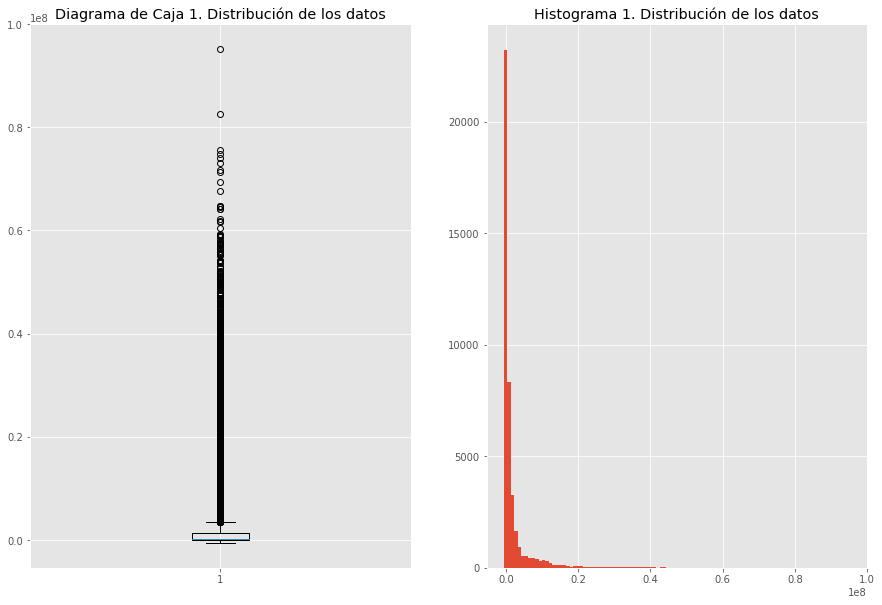

In [9]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.boxplot(subsidiostp_orig['monto'])
plt.title('Diagrama de Caja 1. Distribución de los datos')
plt.subplot(1,2,2)
plt.hist(subsidiostp_orig['monto'], bins=100)
plt.title('Histograma 1. Distribución de los datos')

##### Como vemos, la distribución de los datos tiene alrededor de cero la mayor cantidad de frecuencias, sin mencionar la gran cantidad de valores atípicos que nos muestra el diagrama de caja.
##### Nos proponemos despejar las dudas sobre estos valores.

In [10]:
descrip = subsidiostp_orig.describe()

In [11]:
descrip_min = descrip['monto']['min']
descrip_max = descrip['monto']['max']
print('El valor min dentro de la tabla es: ', descrip_min)
print('El valor max dentro de la tabla es:', descrip_max)

El valor min dentro de la tabla es:  -573035.61
El valor max dentro de la tabla es: 95179101.65


In [12]:
print('El valor max en la tabla:\n\n', subsidiostp_orig[subsidiostp_orig['monto']==descrip_max])
print('\nEl valor min en la tabla:\n\n', subsidiostp_orig[subsidiostp_orig['monto']==descrip_min])

El valor max en la tabla:

           mes           cuit     provincia municipio        monto  \
2415  06/2018  33-54625963-9  BUENOS AIRES      PROV  95179101.65   

                 tipo  
2415  Comp. Tarifaria  

El valor min en la tabla:

            mes           cuit provincia     municipio      monto  \
29734  06/2017  30-67871434-4   CORDOBA  BIALET MASSE -573035.61   

                  tipo  
29734  Comp. Tarifaria  


##### Habíamos dicho que se encontramos valores en cero en la variable 'monto', cuyo impacto en el dataset consistía según podemos señalar rápidamente, consiste en afectar la medición de la media. Por lo tanto, debemos cambiar estos valores y luego eliminarlos, para evitar este efecto. Recordemos que, además, la tabla no contaba con valores NaN, es decir que .isnull() no pudo encontralos ya que tenían el valor de 0.

In [13]:
#Llevamos adelante la operación de reemplazo de valores 0 por NaN
subsidiostp_orig['monto'].replace(0, np.nan, inplace=True)

In [14]:
print('Cantidad total de filas en la tabla original:', subsidiostp_orig.shape[0])
print('Valores faltantes o NaN:', np.count_nonzero(pd.isnull(subsidiostp_orig)))
print('Porcentaje de valores nulos:', round(np.count_nonzero(pd.isnull(subsidiostp_orig))*100/subsidiostp_orig.shape[0]),'%')
print('Tabla sin valores NaN:', subsidiostp_orig.shape[0]-np.count_nonzero(pd.isnull(subsidiostp_orig)))

subsidiostp = subsidiostp_orig.dropna()

Cantidad total de filas en la tabla original: 42631
Valores faltantes o NaN: 5342
Porcentaje de valores nulos: 13 %
Tabla sin valores NaN: 37289


##### Por último, eliminamos los valores menores a cero.

In [15]:
print('Cantidad de valores en variable "monto" menores a 0:', len(subsidiostp[subsidiostp['monto']<0].index))

Cantidad de valores en variable "monto" menores a 0: 2


In [16]:
subsidiostp.drop(subsidiostp[subsidiostp['monto']<0].index[0], inplace=True)
subsidiostp.drop(subsidiostp[subsidiostp['monto']<0].index[0], inplace=True)

C:\Users\Mauricio\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [17]:
print('Cantidad de filas:', subsidiostp.shape[0])

Cantidad de filas: 37287


##### Como podemos observar, la cantidad de filas se redujo en 2, al eliminar los valores, en la variable 'monto', que eran menores a cero. A continuación, consultamos entonces el operador .describe()

In [18]:
print('Descripción de la tabla original:\n', subsidiostp_orig.describe())
print('\nDescripción de la tabla sin valores nulos:\n', subsidiostp.describe())

Descripción de la tabla original:
               monto
count  3.728900e+04
mean   2.488560e+06
std    6.031821e+06
min   -5.730356e+05
25%    9.476688e+04
50%    4.328168e+05
75%    1.741170e+06
max    9.517910e+07

Descripción de la tabla sin valores nulos:
               monto
count  3.728700e+04
mean   2.488713e+06
std    6.031946e+06
min    1.290000e+00
25%    9.480148e+04
50%    4.328942e+05
75%    1.741236e+06
max    9.517910e+07


##### Como vemos, eliminar los valores nulos de la variable 'monto', no ha provocado un gran impacto en los valores generales de la tabla. Esto queda demostrado a partir de la tendencia general mostrada por la operación .describe(). El mínimo es ahora un valor positivo, mientras que la media se ha ajustado a la nueva cantidad de filas.
##### Con respecto al valor mínimo, pierde sentido que sea de 1.29 pesos, aunque la evolución entre este y los siguientes (ordenados los datos ascendientemente) no es del todo sin sentido ya que no se realizan grandes saltos y la evolución es escalonada, como se observa en el gráfico de barras 1. Consideramos, pues, mantenerlo.

Text(0.5,1,'Gráfico de barras 1.Distribución de los 50\n primeros datos desde el valor mínimo')

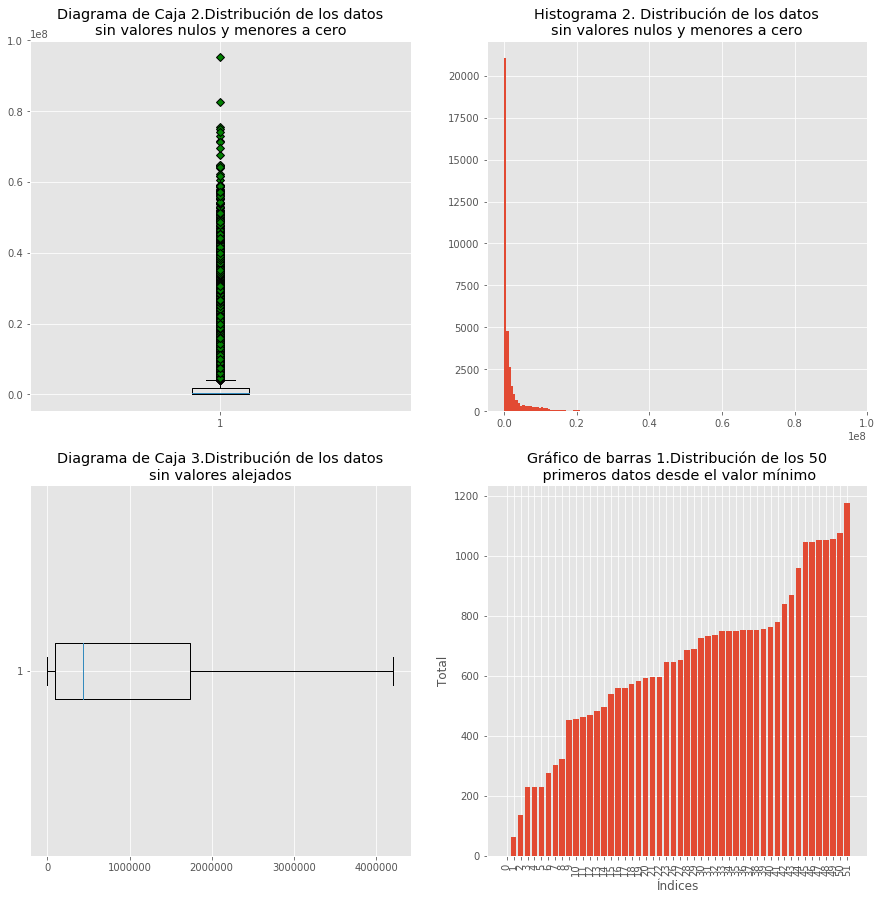

In [19]:
green_diamond = dict(markerfacecolor='g', marker='D')
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)

plt.boxplot(subsidiostp['monto'], flierprops=green_diamond)
plt.title('Diagrama de Caja 2.Distribución de los datos\nsin valores nulos y menores a cero')
plt.subplot(2,2,2)

plt.hist(subsidiostp['monto'], bins=150)
plt.title('Histograma 2. Distribución de los datos\nsin valores nulos y menores a cero')
plt.subplot(2,2,3)

plt.boxplot(subsidiostp['monto'], vert=False, showfliers=False)
plt.title('Diagrama de Caja 3.Distribución de los datos\nsin valores alejados')

plt.subplot(2,2,4)
plt.bar(subsidiostp.index[:50], 'monto', data=subsidiostp.sort_values('monto').iloc[:50])
plt.xticks(rotation=90)
plt.xlabel('Índices')
plt.ylabel('Total')
plt.title('Gráfico de barras 1.Distribución de los 50\n primeros datos desde el valor mínimo')

##### Por último, nos queda corregir la variable 'mes', de modo que sea operacional desde pandas y python: pd.to_datetime()

In [20]:
#Pasamos la columna 'mes' a datetime
mes_total = pd.to_datetime(subsidiostp['mes'])

In [21]:
#Descartamos la columna 'mes' original y asignamos la nueva columna a la tabla
subsidiostp = subsidiostp.drop('mes', axis=1)
subsidiostp['mes'] = mes_total
subsidiostp.head(2)

,cuit,provincia,municipio,monto,tipo,mes
0,30-64701983-4,BUENOS AIRES,ALMIRANTE BROWN,602505.04,Comp. Gasoil,2018-07-01
1,30-64701983-4,BUENOS AIRES,ALMIRANTE BROWN,3566518.75,Comp. Tarifaria,2018-07-01


### Limpio el dataset, pasamos a analizarlo.

##### Como podemos concluir a partir de los datos presentados arriba, ya sea la descripción general de las tendencias de la tabla como así también lo que nos brindan los gráficos, es que a lo largo de los 19 meses que incluye el dataset los subsidios se concentraron entre los valores señalados por los cuartiles junto al valor min y al valor max.
##### Estos valores son:

In [22]:
print('Cuartil 1: $', subsidiostp['monto'].quantile(q=0.25))
print('Cuartil 2: $', subsidiostp['monto'].quantile(q=0.5))
print('Cuartil 3: $', subsidiostp['monto'].quantile(q=0.75))
print('Valor máximo: $', subsidiostp['monto'].quantile(q=1))

Cuartil 1: $ 94801.48000000001
Cuartil 2: $ 432894.17
Cuartil 3: $ 1741235.625
Valor máximo: $ 95179101.65


##### Con estos datos hallamos también los atípicos o alejados superiores, los cuales corresponden a montos de dinero que fueron girados durante los 19 meses que cubre el dataset, y que son mostrados claramente por el diagrama de caja. Estos valores atípicos en la variable 'monto', corresponden a valores mayores al señalado por el valor máximo en el bigote del diagrama (el cuál no es el valor "max" brindado por .describe()).

In [23]:
print('Bigote superior de la caja, Q3 + 1.5*IQR, marca el monto de: $', subsidiostp['monto'].quantile(q=0.75) +1.5*(subsidiostp['monto'].quantile(q=0.75)-subsidiostp['monto'].quantile(q=0.25)))

Bigote superior de la caja, Q3 + 1.5*IQR, marca el monto de: $ 4210886.8425


##### En este sentido, los valores alejados que muestra el diagrama de caja se hallan entre este valor y el valor max en .describe()

In [24]:
mayor_a_q3_iqr = subsidiostp['monto']>subsidiostp['monto'].quantile(q=0.75) +1.5*(subsidiostp['monto'].quantile(q=0.75)-subsidiostp['monto'].quantile(q=0.25))
q1_q3 = (subsidiostp['monto']>=subsidiostp['monto'].quantile(q=0.25)) & (subsidiostp['monto']<=subsidiostp['monto'].quantile(q=0.75))
bi_q1 = (subsidiostp['monto']<=subsidiostp['monto'].quantile(q=0.25)) & (subsidiostp['monto']>0)
q3_bs = (subsidiostp['monto']>=subsidiostp['monto'].quantile(q=0.75)) & (subsidiostp['monto']<=4210886.8425)


print('Cantidad de valores entre el cuartil 1 y el bigote inferior (25%):', round((25*len(subsidiostp))/100))
#print('Porcentaje del total al que corresponde:', round(len(subsidiostp[bi_q1])*100/len(subsidiostp)), '%')
print('\nCantidad de valores entre el cuartil 1 y 3 (50%):', round((50*len(subsidiostp))/100))
#print('Porcentaje del total al que corresponde:', round(len(subsidiostp[q1_q3])*100/len(subsidiostp)), '%')
print('\nCantidad de valores entre el cuartil 3 y el bigote superior:', len(subsidiostp[q3_bs]))
print('Porcentaje del total al que corresponde:', round(len(subsidiostp[q3_bs])*100/len(subsidiostp)), '%')
print('\nCantidad de valores alejados superiores:', len(subsidiostp[mayor_a_q3_iqr]))
print('Porcentaje del total al que corresponde:', round(len(subsidiostp[mayor_a_q3_iqr])*100/len(subsidiostp)), '%')

Cantidad de valores entre el cuartil 1 y el bigote inferior (25%): 9322

Cantidad de valores entre el cuartil 1 y 3 (50%): 18644

Cantidad de valores entre el cuartil 3 y el bigote superior: 4114
Porcentaje del total al que corresponde: 11 %

Cantidad de valores alejados superiores: 5208
Porcentaje del total al que corresponde: 14 %


##### Por lo tanto, comprendemos que la mayor concentración de los datos de la variable monto, ronda de 0 al cuartil 3, comprendiendo el 75% de los datos, describiendo una distribución sesgada asimétrica hacia la derecha según el diagrama de caja y el histograma 2, donde además se aprecia la concentración.
##### Con todo, si segmentamos la lista de subsidios en intervalos podremos ver las frecuencias de estos mismos, para tener una otro punto de vista de la distribución de datos.
##### Para esto, creamos dos funciones que construyen los intervalos, por un lado, y calculan la frecuencia, por otro.

In [25]:
def intervals(minimo, maximo, k):
    interv=[]
    intervalos=[]
    import math as mt
    k_intervals = mt.modf(1+3.322*np.log10(k))[1]
    rango = (maximo-minimo)/k_intervals
    num = minimo
    for i in np.arange(k_intervals):
        interv= np.append(interv, num)
        num_rango= num + rango
        interv= np.append(interv, num_rango)
        num = num_rango
       
    interv = interv.reshape(int(k_intervals), 2)        
    for i in np.arange(len(interv)):
        pandas_interv = pd.Interval(round(interv[i:i+1, 0:].item(0)), 
                                    round(interv[i:i+1, 0:].item(1)), 
                                    closed='left')
        intervalos = np.append(intervalos, pandas_interv)
    return intervalos

In [26]:
def freq_intervals(var_N, intervals):
    n_interv = 0*np.arange(len(intervals))
    for i in np.arange(len(var_N)):
        for a in np.arange(len(intervals)):
            if var_N[i] in intervals[a]:
                n_interv[a] = n_interv[a]+1
    return n_interv

In [27]:
def tabla_interv_freq_odds(variable):
    minimo = variable.describe()[3].item()
    maximo = variable.describe()[7].item()
    k = len(variable)
    calc_intervalos= intervals(minimo, maximo, k)
    fi=freq_intervals(variable, calc_intervalos)
    prob=[]
    for i in np.arange(len(fi)):
        prob=np.append(prob, fi[i]/len(variable))
    odds=[]
    for i in np.arange(len(fi)):
        odds=np.append(odds, (prob[i]/(1-prob[i]))*100)
    
    tabla_inter_freq_odds = pd.DataFrame({'Intervalos' : calc_intervalos,
                                          'Frecuencia' : fi,
                                          'Probabilidades' : prob,
                                          'Odds (%)' : odds})
    
    return tabla_inter_freq_odds

##### De acuerdo a los valores min y max demostrados en el .describe() y el largo de la lista de subsidios, obtenemos los intervalos y las frecuencias de estos: 

In [28]:
frec_interv = tabla_interv_freq_odds(subsidiostp['monto'])
print('Intervalos y frecuencia de subsidios:\n\n', frec_interv)

Intervalos y frecuencia de subsidios:

               Intervalos  Frecuencia  Probabilidades    Odds (%)
0           [1, 5948695)       33048        0.886314  779.617834
1    [5948695, 11897389)        2324        0.062327    6.647027
2   [11897389, 17846083)         801        0.021482    2.195363
3   [17846083, 23794776)         395        0.010594    1.070693
4   [23794776, 29743470)         256        0.006866    0.691313
5   [29743470, 35692164)         153        0.004103    0.412021
6   [35692164, 41640858)         141        0.003781    0.379583
7   [41640858, 47589551)          75        0.002011    0.201548
8   [47589551, 53538245)          43        0.001153    0.115455
9   [53538245, 59486939)          32        0.000858    0.085895
10  [59486939, 65435633)           9        0.000241    0.024143
11  [65435633, 71384327)           3        0.000080    0.008046
12  [71384327, 77333020)           5        0.000134    0.013411
13  [77333020, 83281714)           1        0.0000

##### En este sentido, el primer intervalo es el más frecuente, es decir que durante los 19 meses que se incluyen en la tabla de los subsidios estos rondaron mayormente entre 1 peso y 6 millones de pesos, teniendo este intervalo una probabilidad de 0.88, o una ventaja (odd) sobre el resto de cerca de 800%.

In [29]:
#Con las columnas ordenadas, podemos calcular el total de subsidios para 2017 hasta julio de 2018
print('Según el dataset que analizamos, el monto total de los subsidios durante 2017 hasta julio de 2018 es de', round(sum(subsidiostp['monto'])),
      '\nmillones de pesos, los cuales se hallan repartidos entre', len(subsidiostp['provincia'].unique()), 'provincias y', len(subsidiostp['municipio'].unique()), 'municipios.')

Según el dataset que analizamos, el monto total de los subsidios durante 2017 hasta julio de 2018 es de 92796658916 
millones de pesos, los cuales se hallan repartidos entre 25 provincias y 180 municipios.


### Dividiendo la tabla según el año

In [30]:
#Creamos el filtro subsaño_ para dividir el dataset en dos tablas: Año 2017 y Año 2018
subsaño_2017 = subsidiostp['mes'] < '2018-01-01'
subsaño_2018 = subsidiostp['mes'] >= '2018-01-01'

In [31]:
#Aplicamos el filtro para obtener el año 2017: 
#(la misma operación puede obtenerse de la siguiente forma substp2017 = subsidiostp[subsidiostp['mes'] < '2018-01-01'])
substp2017 = subsidiostp[subsaño_2017]
substp2017 = substp2017.reset_index(drop=True)
substp2017.head()

,cuit,provincia,municipio,monto,tipo,mes
0,30-64701983-4,BUENOS AIRES,ALMIRANTE BROWN,4619623.74,Comp. Tarifaria,2017-12-01
1,30-64701983-4,BUENOS AIRES,ALMIRANTE BROWN,462362.47,Comp. Gasoil,2017-12-01
2,30-65080001-6,BUENOS AIRES,ALMIRANTE BROWN,2020299.81,Comp. Gasoil,2017-12-01
3,30-65080001-6,BUENOS AIRES,ALMIRANTE BROWN,14072007.35,Comp. Tarifaria,2017-12-01
4,30-68586179-4,BUENOS AIRES,ALMIRANTE BROWN,9960549.62,Comp. Tarifaria,2017-12-01


In [32]:
#Año 2018
substp2018 = subsidiostp[subsaño_2018]
substp2018 = substp2018.reset_index(drop=True)
substp2018.head()

,cuit,provincia,municipio,monto,tipo,mes
0,30-64701983-4,BUENOS AIRES,ALMIRANTE BROWN,602505.04,Comp. Gasoil,2018-07-01
1,30-64701983-4,BUENOS AIRES,ALMIRANTE BROWN,3566518.75,Comp. Tarifaria,2018-07-01
2,30-65080001-6,BUENOS AIRES,ALMIRANTE BROWN,2671472.37,Comp. Gasoil,2018-07-01
3,30-65080001-6,BUENOS AIRES,ALMIRANTE BROWN,10109007.08,Comp. Tarifaria,2018-07-01
4,30-68586179-4,BUENOS AIRES,ALMIRANTE BROWN,8344281.71,Comp. Tarifaria,2018-07-01


##### Exploramos las tablas correspondientes a los años 2017 y 2018, resultado del corte que realizamos.

In [33]:
print('Valores generales 2017:\n\n', substp2017.describe())
print('\nValores generales 2018:\n\n',substp2018.describe())

Valores generales 2017:

               monto
count  2.392300e+04
mean   2.319320e+06
std    5.684671e+06
min    2.300300e+02
25%    8.657178e+04
50%    3.918915e+05
75%    1.585273e+06
max    8.265977e+07

Valores generales 2018:

               monto
count  1.336400e+04
mean   2.791946e+06
std    6.597558e+06
min    1.290000e+00
25%    1.139141e+05
50%    5.167410e+05
75%    2.045298e+06
max    9.517910e+07


Text(0.5,1,'Diagramas de Caja.\n 2018, sin valores alejados')

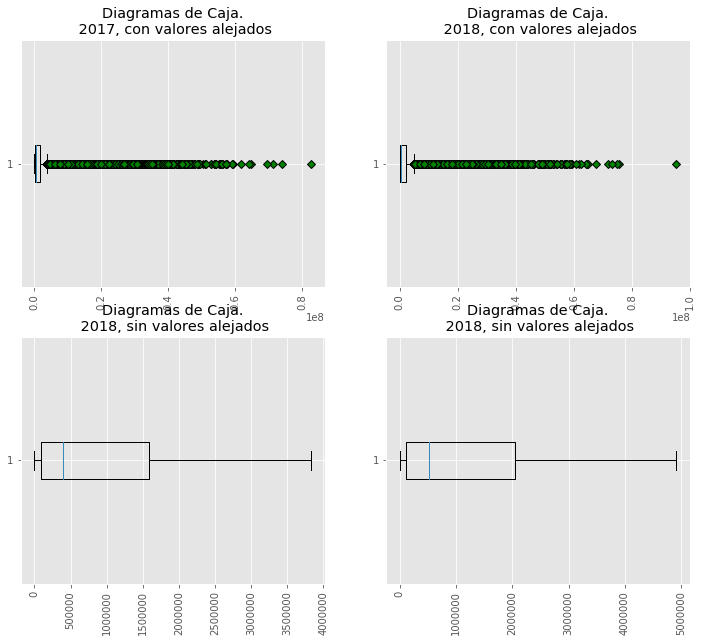

In [34]:
green_diamond = dict(markerfacecolor='g', marker='D')
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.boxplot(substp2017['monto'], vert=False, flierprops=green_diamond)
plt.xticks(rotation=90)
plt.title('Diagramas de Caja.\n 2017, con valores alejados')
plt.subplot(2,2,2)
plt.boxplot(substp2018['monto'], vert=False, flierprops=green_diamond)
plt.xticks(rotation=90)
plt.title('Diagramas de Caja.\n 2018, con valores alejados')
plt.subplot(2,2,3)
plt.boxplot(substp2017['monto'], vert=False, showfliers=False)
plt.xticks(rotation=90)
plt.title('Diagramas de Caja.\n 2018, sin valores alejados')
plt.subplot(2,2,4)
plt.boxplot(substp2018['monto'], vert=False, showfliers=False)
plt.xticks(rotation=90)
plt.title('Diagramas de Caja.\n 2018, sin valores alejados')

In [35]:
print('Tabla de frecuencia de intervalos, año 2017:\n\n', tabla_interv_freq_odds(substp2017['monto']))
print('\nTabla de frecuencia de intervalos, año 2018:\n\n', tabla_interv_freq_odds(substp2018['monto']))

Tabla de frecuencia de intervalos, año 2017:

               Intervalos  Frecuencia  Probabilidades    Odds (%)
0         [230, 5510866)       21203        0.886302  779.522059
1    [5510866, 11021501)        1458        0.060946    6.490096
2   [11021501, 16532137)         548        0.022907    2.344385
3   [16532137, 22042773)         252        0.010534    1.064594
4   [22042773, 27553409)         149        0.006228    0.626735
5   [27553409, 33064044)         105        0.004389    0.440843
6   [33064044, 38574680)          69        0.002884    0.289260
7   [38574680, 44085316)          78        0.003260    0.327113
8   [44085316, 49595951)          33        0.001379    0.138133
9   [49595951, 55106587)           9        0.000376    0.037635
10  [55106587, 60617223)          12        0.000502    0.050186
11  [60617223, 66127858)           3        0.000125    0.012542
12  [66127858, 71638494)           2        0.000084    0.008361
13  [71638494, 77149130)           1       

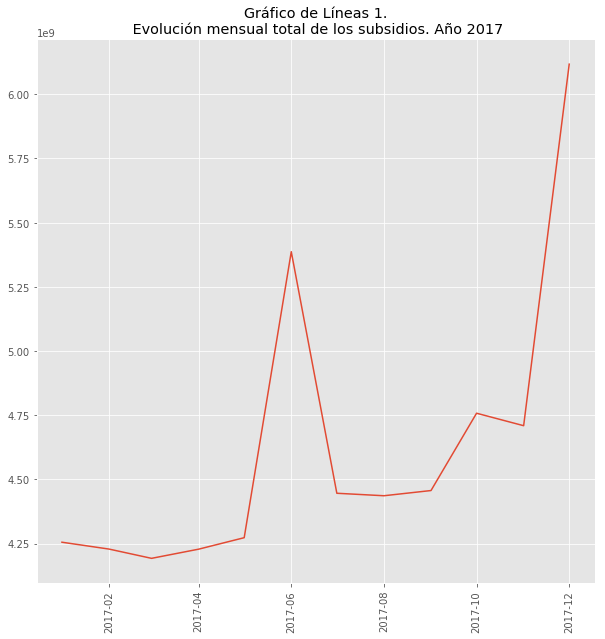

In [36]:
evolución_x_mes = substp2017.groupby('mes', as_index=False).agg({'monto' : 'sum'})
plt.figure(figsize=(10,10))
plt.plot('mes', 'monto', data= evolución_x_mes)
plt.xticks(rotation=90)
plt.title('Gráfico de Líneas 1.\n Evolución mensual total de los subsidios. Año 2017')
plt.show()

In [37]:
#Contamos cantidad de municipios con len().unique()
print('Cantidad de nombres diferentes de provincias, 2017:', len(substp2017['provincia'].unique()),'\nCantidad de nombres diferentes de municipios, 2017:', len(substp2017['municipio'].unique()))
print('Cantidad de nombres diferentes de provincias, 2018:', len(substp2018['provincia'].unique()),'\nCantidad de nombres diferentes de municipios, 2018:', len(substp2018['municipio'].unique()))

Cantidad de nombres diferentes de provincias, 2017: 25 
Cantidad de nombres diferentes de municipios, 2017: 180
Cantidad de nombres diferentes de provincias, 2018: 25 
Cantidad de nombres diferentes de municipios, 2018: 175


##### Hallamos que en los primeros seis meses de 2018, no se le giraron subsidios a todos los municipios, debido a que solo se muestran 175 de los 180 del total. Veamos cuáles son los faltantes:

In [38]:
municipios_faltantes = np.setdiff1d(substp2017['municipio'].unique(), substp2018['municipio'].unique()).tolist()
muni_prov=[]
for i in np.arange(len(municipios_faltantes)):
    muni_prov = np.append(muni_prov, substp2017['provincia'][substp2017['municipio'] == np.array(municipios_faltantes)[i]].unique().item())
print('Municipios faltantes en 2018 con respecto a 2017:\n', municipios_faltantes, '\nProvincias a las que corresponden:\n', muni_prov)

Municipios faltantes en 2018 con respecto a 2017:
 ['EL CALAFATE', 'EMBARCACION', 'JUNIN DE LOS ANDES', 'MACHAGAI', 'ZAPALA'] 
Provincias a las que corresponden:
 ['SANTA CRUZ' 'SALTA' 'NEUQUEN' 'CHACO' 'NEUQUEN']


##### Con respecto a la cantidad de provincias, Argentina tiene 23 provincias. En este sentido, hay dos provincias de más. Veamos cuáles son.

In [39]:
print('Provincias contabilizadas para los subsidios:\n', substp2017['provincia'].unique())

Provincias contabilizadas para los subsidios:
 ['BUENOS AIRES' 'C.A.B.A.' 'CATAMARCA' 'CHACO' 'CHUBUT' 'CORDOBA'
 'CORRIENTES' 'ENTRE RIOS' 'FORMOSA' 'JN' 'JUJUY' 'LA PAMPA' 'LA RIOJA'
 'MENDOZA' 'MISIONES' 'NEUQUEN' 'RIO NEGRO' 'SALTA' 'SAN JUAN' 'SAN LUIS'
 'SANTA CRUZ' 'SANTA FE' 'SANTIAGO DEL ESTERO' 'TIERRA DEL FUEGO'
 'TUCUMAN']


##### Encontramos C.A.B.A. y JN como instancias de la variable 'provincia'. Siendo la primera la Ciudad Autónoma de Buenos Aires, JN es "Jurisdicción Nacional", para líneas de colectivo que cruzan al menos dos distritos interprovinciales. Debemos analizar el peso que tienen ambas instancias, y la información que nos brindan.

In [40]:
#Agrupamos por provincia sumando el 'monto' de los subsidios para obtener una tabla ordenada de mayor a menor monto.
substp_porprov2017_1 = substp2017.groupby(['provincia'], as_index=False).agg({'municipio' : 'first', 'monto' : 'sum'}).sort_values('monto', ascending=False).reset_index(drop=True)

In [41]:
print('Monto total recibido por CABA como subsidios durante 2017:', substp_porprov2017_1[substp_porprov2017_1['provincia']=='C.A.B.A.']['monto'].item(), '\nPosición de CABA de acuerdo a lo subsidiado:', substp_porprov2017_1.index[substp_porprov2017_1['provincia']=='C.A.B.A.'].tolist())
print('\nMonto total recibido por JN como subsidios durante 2017:', substp_porprov2017_1[substp_porprov2017_1['provincia']=='JN']['monto'].item(), '\nPosición de JN de acuerdo a lo subsidiado:', substp_porprov2017_1.index[substp_porprov2017_1['provincia']=='JN'].tolist())

Monto total recibido por CABA como subsidios durante 2017: 20407378380.279964 
Posición de CABA de acuerdo a lo subsidiado: [0]

Monto total recibido por JN como subsidios durante 2017: 507833811.63000005 
Posición de JN de acuerdo a lo subsidiado: [12]


##### Como vemos, CABA es la primera jurisdicción en cuanto a los subsidios recibidos, en el orden de los 20 mil millones de pesos durante 2017. Por su parte, JN se encuentra décimo tercera (recordemos que python cuenta desde 0) con poco más de 500 millones de pesos recibidos. No obstante, también debemos observar la relación con la variable "municipio".

In [42]:
print('Variable "municipio" relacionada a la variable "provincia".')
print('\nInstancia de CABA:', substp2017[substp2017['provincia']== 'C.A.B.A.']['municipio'].unique().item())
print('Instancia de JN:', substp2017[substp2017['provincia']== 'JN']['municipio'].unique().item())

Variable "municipio" relacionada a la variable "provincia".

Instancia de CABA: C.A.B.A.
Instancia de JN: JN


##### Debido a que el "municipio" de JN está señalado como JN, la información que nos brinda geográficamente no tiene valor ya que no podemos ubicar JN en ninguna provincia del territorio argentino, a diferencia obvia de la Ciudad Autónoma de Buenos Aires (representada por la instancia 'C.A.B.A.'). No obstante, ya que JN corresponde a subsidios a empresas (tanto así como las demás instancias de la variable "provincia"), la información asociada a la fila de JN debe tenerse en cuenta en el caso de otras variables como 'cuit', donde se encuentran las empresas subsidiadas.
##### Surge la pregunta en cuánto fue subsidiada cada provincia:

In [43]:
#PREPARACIÓN DE LA TABLA PARA REGRESIÓN LINEAL
substp2017_sn_mun = substp2017.drop('municipio', axis=1)
agr_mes=[]
agr_prov=[]
agr_monto=[]
for i in np.arange(len(substp2017_sn_mun['provincia'].unique())):
    prov = substp2017_sn_mun['provincia'].unique()[i]
    for i in np.arange(len(substp2017_sn_mun['mes'].unique())):
        mes = substp2017_sn_mun['mes'].unique()[i]
        suma_mes= substp2017_sn_mun[(substp2017_sn_mun['mes']== mes)
                                    & (substp2017_sn_mun['provincia']== prov)]['monto'].sum()
        agr_mes=np.append(agr_mes, pd.to_datetime(mes))
        agr_prov=np.append(agr_prov, prov)
        agr_monto=np.append(agr_monto, suma_mes)
prov_monto_mes = pd.DataFrame({'provincia' : agr_prov,
                               'mes' : agr_mes,
                               'monto acumulado' : agr_monto})

prov_monto_mes1 = prov_monto_mes.drop('provincia', axis=1).T

fila_mes = prov_monto_mes1.iloc[1:,0:12]
c=12
c1=24
tabla_mes=prov_monto_mes1.iloc[1:,0:12]
for i in np.arange((300/12)-1):    
    fila1=prov_monto_mes1.iloc[1:,c:c1]
    fila1.columns=fila_mes.columns
    tabla_mes=pd.concat([tabla_mes, fila1])
    c=c+12
    c1=c1+12
    
tabla_mes=tabla_mes.reset_index(drop=True)
tabla_mes.index=prov_monto_mes['provincia'].unique()
tm_columnas = tabla_mes.columns
tm_columnas = np.flip(tm_columnas)
tabla_mes = tabla_mes[tm_columnas]
tabla_mes.columns = np.arange(12)

#Regresión Lineal aplicada a los subsidios mes a mes
from sklearn.linear_model import LinearRegression
pred = LinearRegression().fit(tabla_mes.iloc[:,0:3], tabla_mes.iloc[:, 3:6])
pred.score(tabla_mes.iloc[:,0:3], tabla_mes.iloc[:, 3:6])
predict = pred.predict(tabla_mes.iloc[:, 6:9])
X=tabla_mes.iloc[:, 9:12]
res = predict-X
#100 - round(abs((res/X)*100)).mean()
comp = pd.DataFrame({'Original 1' : X[9].reset_index(drop=True),
                     'Predicción 1' : np.ravel(predict[:,0:1]),
                     'Original 2' : X[10].reset_index(drop=True),
                     'Predicción 2' : np.ravel(predict[:, 1:2]),
                     'Original 3' : X[11].reset_index(drop=True),
                     'Predicción 3' : np.ravel(predict[:, 2:])})

In [44]:
tabla_mes_index = tabla_mes.T

In [45]:
tabla_mes_index.index= pd.date_range(start='01-01-2017', periods=12)

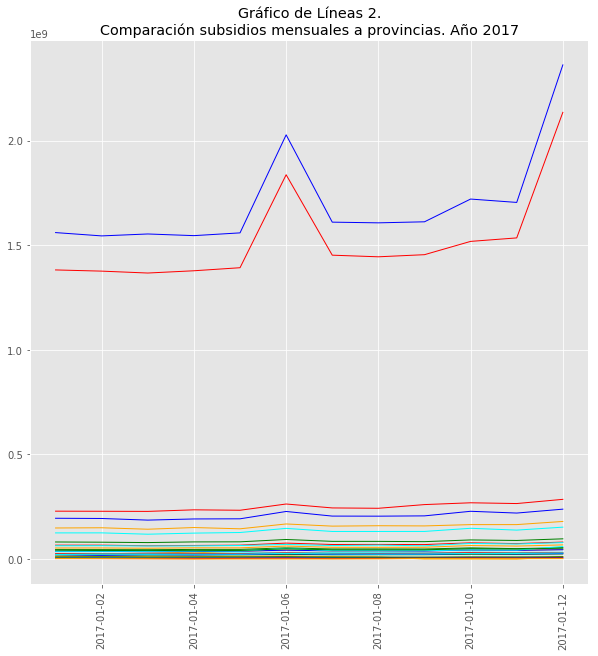

In [46]:
plot = 0
plot, plt.figure(figsize=(10,10))
plot, plt.title('Gráfico de Líneas 2.\nComparación subsidios mensuales a provincias. Año 2017')
plot, plt.xticks(rotation=90)

colors = ['r', 'b', 'g', 'orange', 'cyan']*5
for i in np.arange(len(tabla_mes_index.columns)):
    prov_nom=tabla_mes_index.columns[i]
    plot = plt.plot_date(tabla_mes_index.index, tabla_mes_index[prov_nom], 'go-', color=colors[i], linewidth=1, markersize=0)

##### Como podemos observar, Buenos Aires y CABA son las provincias con más subsidios en comparación al resto. Como se vió además en el Gráfico de líneas 1, la evolución de los subsidios se incrementa mes a mes desde enero a diciembre, experimentándose dos saltos o incrementos pronunciados, hacia el mes de junio y hacia diciembre.

### Agrupamiento
#### Subsidios por provincia
##### En primer lugar, llevamos adelante una exploración provincial de los subsidios

Text(0.5,1,'Gráfico de barras 2. Comparación de subsidios por provincia')

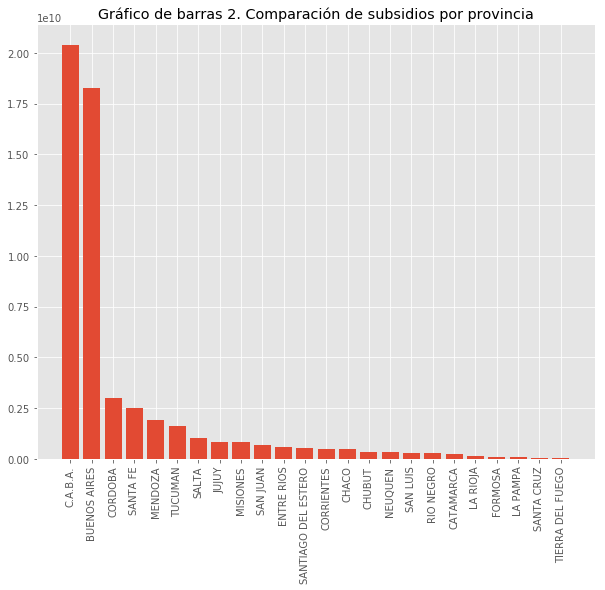

In [47]:
#Agrupamos por provincia. Descartamos la fila 12, correspondiente a JN de acuerdo señalamos más arriba.
substp_porprov2017 = substp2017.groupby(['provincia'], as_index=False).agg({'monto' : 'sum'}).sort_values('monto', ascending=False).reset_index(drop=True).drop(12).reset_index(drop=True)
#Graficamos lo obtenido del agrupamiento según provincia
plt.figure(figsize=(10,8))
plt.bar('provincia', 'monto', data=substp_porprov2017)
plt.xticks(rotation=90)
plt.title('Gráfico de barras 2. Comparación de subsidios por provincia')

##### De la observación del gráfico de barras 2, se profundiza la pregunta al respecto de los subsidios: ¿Qué hace que CABA y la provincia de Buenos Aires obtengan tanto en comparación al resto? Se debe a ¿cantidad de población?, ¿a la superficie en km2 por provincia o distrito? ¿a la cantidad de empresas con las que cuenta cada provincia?
##### En este sentido, recabamos estos datos poblacionales y geográficos:

In [48]:
población = pd.Series([17020012, 3063728, 404433, 1168165, 587956,3645321,1090938,1347508, 589916, 745252,349299, 378047,1928304, 1218771,637913,718646,1370283,755994,489225,338542,3453674,948172,160720,1633992])
superf_prov = pd.Series([307571, 203, 102602, 99633, 224686, 165321, 88199, 78781, 72066, 53219, 143440, 89680, 148827, 29801, 94078, 203013, 155488, 89651, 76748, 243943, 133007, 136351, 21263, 22524]) 

##### Extraemos del dataset, la cantidad de empresas por provincia, y la alojamos en la variable 'cuenta':

In [49]:
cuenta = []
for i in np.arange(len(substp_porprov2017)):
    e=str(substp_porprov2017['provincia'].loc[i])
    elemento2 = substp2017['provincia'] == e
    prov = substp2017[elemento2]
    cantmun = len(prov['cuit'].unique())
    cuenta = np.append(cuenta, cantmun)

In [50]:
print('Cantidad de empresas por provincia:\n', cuenta)

Cantidad de empresas por provincia:
 [ 89. 148.  60.  64.  18.  57.  24.  28.  62.  10.  53.  25.  26.  30.
  19.  14.  10.  14.  34.  10.   4.  26.   8.   4.]


##### Teniendo estos elementos, los sumamos a la tabla agrupada por provincia para el año 2017:

In [51]:
substp_porprov2017_copy = substp_porprov2017.sort_values('provincia').reset_index(drop=True)
substp_porprov2017_copy['población 2017'] = población
substp_porprov2017_copy['superficie m2'] = superf_prov
substp_porprov2017_copy['cantidad empresas'] = cuenta

In [52]:
print('Primeras filas de la tabla con las variables poblacionales y geográficas:\n\n', substp_porprov2017_copy.head(3))

Primeras filas de la tabla con las variables poblacionales y geográficas:

       provincia         monto  población 2017  superficie m2  \
0  BUENOS AIRES  1.827284e+10        17020012         307571   
1      C.A.B.A.  2.040738e+10         3063728            203   
2     CATAMARCA  2.564904e+08          404433         102602   

   cantidad empresas  
0               89.0  
1              148.0  
2               60.0  


In [53]:
#De aquí en más, trabajaremos con substp_porprov2017_copy

##### Por lo tanto, los subsidios, distribuidos como vimos en los gráficos de línea 2 y de barras 2, ¿están en relación a qué variables? Para comenzar a responder a esta pregunta, debemos observar la correlación existente entre las variables que construimos.

In [99]:
print('Coeficiente de correlación entre variables: numpy.corrcoef\n')
print('Correlación Subsidios-Población:', np.corrcoef(substp_porprov2017_copy['población 2017'], substp_porprov2017_copy['monto'])[0,1])
print('Correlación Subsidios-Superficie:', np.corrcoef(substp_porprov2017_copy['superficie m2'], substp_porprov2017_copy['monto'])[0,1])
print('Correlación Subsidios-Cantidad de Empresas:', np.corrcoef(substp_porprov2017_copy['cantidad empresas'], substp_porprov2017_copy['monto'])[0,1])

Coeficiente de correlación entre variables: numpy.corrcoef

Correlación Subsidios-Población: 0.7397253377758221
Correlación Subsidios-Superficie: 0.125730397596604
Correlación Subsidios-Cantidad de Empresas: 0.7787980960521707


##### Como podemos observar, hay una alta correlación entre los subsidios, en relación a la población y la cantidad de empresas. Más aún, el coeficiente de correlación es más alto cuando se correlacionan subsidios y empresas. Al parecer, entonces, estos son girados en función de estos factores. Pongamos el foco en los subsidios según la población, ya que como fue desplegado en los gráficos de líneas y de barras 2, CABA aparecía a la par de la Provincia de Buenos Aires. Debemos tener en cuenta en este punto las poblaciones de ambas jurisdicciones:

In [55]:
print('Población provincia de Buenos Aires, año 2017:', substp_porprov2017_copy[substp_porprov2017_copy['provincia'] == 'BUENOS AIRES']['población 2017'].iloc[0])
print('Población provincia de CABA, año 2017:', substp_porprov2017_copy[substp_porprov2017_copy['provincia'] == 'C.A.B.A.']['población 2017'].iloc[0])

Población provincia de Buenos Aires, año 2017: 17020012
Población provincia de CABA, año 2017: 3063728


##### Según el gráfico de líneas 2, CABA y la prov. de Buenos Aires están casi a la par en subsidios, más no en población. Por este motivo, debemos ahondar en esta cuestión.

In [56]:
monto_dia = []
for i in np.arange(len(substp_porprov2017_copy)):
    resultado = ((substp_porprov2017_copy['monto'].loc[i]/substp_porprov2017_copy['población 2017'].loc[i])/365)
    monto_dia = np.append(monto_dia, resultado)

In [57]:
substp_porprov2017_copy['monto por día'] = monto_dia

In [58]:
substp_porprov2017_copy.sort_values('monto', ascending=False).head()

,provincia,monto,población 2017,superficie m2,cantidad empresas,monto por día
1,C.A.B.A.,2.040738e+10,3063728,203,148.0,18.249213
0,BUENOS AIRES,1.827284e+10,17020012,307571,89.0,2.941395
5,CORDOBA,2.985551e+09,3645321,165321,57.0,2.243861
20,SANTA FE,2.491721e+09,3453674,133007,4.0,1.976629
12,MENDOZA,1.889694e+09,1928304,148827,26.0,2.684869


##### Como encontramos en la tabla, las primeras 5 provincias más subsidiadas no difieren mucho en los subsidios de acuerdo a la cantidad de habitantes por día. Sin embargo, llama poderosamente la atención el caso de CABA, donde la Nación subsidia a sus habitantes en 18 pesos al día. 

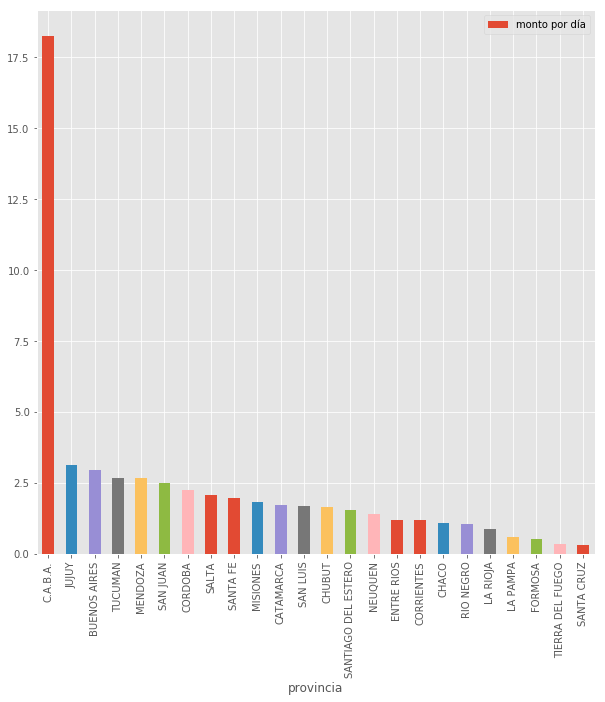

In [101]:
substp_porprov2017_copy.sort_values('monto por día', ascending=False).plot.bar('provincia','monto por día', figsize=(10,10))
plt.show()

##### A continuación, buscamos una relación entre los partidos políticos gobernantes y las provincias más subsidiadas de acuerdo al monto por habitante.

In [60]:
partidos_pol = pd.Series(['Pro', 'Pro', 'PJ-FPV', 'PJ', 'ChST', 'PJ', 'UCR', 'PJ', 'PJ-FPV', 'UCR', 'PJ', 'PJ-FPV', 'UCR', 'FPV', 'MPN', 'FG', 'PJ', 'PJ-FPV', 'PJ', 'PJ-FPV', 'FPCYS', 'FC-FPV', 'PJ-FPV', 'PJ-FPV'])
substp_porprov2017_copy['Partidos por provincia'] = partidos_pol
color_list =pd.Series(['xkcd:yellow', 'xkcd:yellow', 'xkcd:blue', 'xkcd:cyan', 'purple', 'xkcd:cyan', 'red','xkcd:cyan', 'xkcd:blue', 'red', 'xkcd:cyan', 'xkcd:blue', 'red', 'xkcd:blue', 'xkcd:green', 'xkcd:grey','xkcd:cyan','xkcd:blue','xkcd:cyan','xkcd:blue','xkcd:orange','xkcd:blue', 'xkcd:blue','xkcd:blue'])
substp_porprov2017_copy['color list'] = color_list
substp_porprov2017_sorted_pp = substp_porprov2017_copy.sort_values('monto por día', ascending=False)

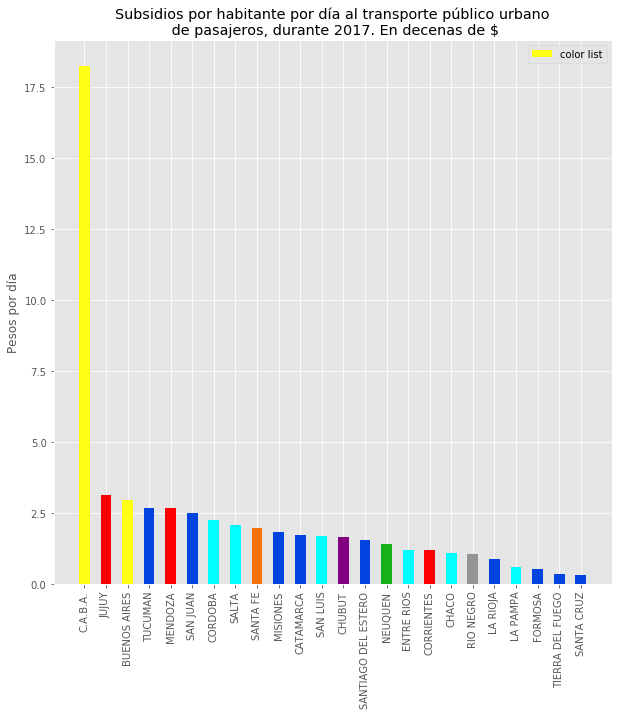

In [61]:
plt.figure(figsize=(10,10))
plt.bar('provincia', 'monto por día', color= 'color list', data=substp_porprov2017_sorted_pp, width=0.5)
plt.title('Subsidios por habitante por día al transporte público urbano\n de pasajeros, durante 2017. En decenas de $')
plt.ylabel('Pesos por día')
plt.legend(['color list'])
plt.xticks(rotation=90)
plt.show()

##### De las cinco primeras provincias con sus habitantes más subsidados, solo una no corresponde a la coalición gobernante (Cambiemos, compuesta por el Pro -amarillo- y la UCR -rojo-). Además, CABA supera por mucho al resto de las provincias.

In [62]:
print('Importe uniforme por igual para cada habitante: $', round(sum(substp_porprov2017_copy['monto'])/sum(substp_porprov2017_copy['población 2017'])/365, 2))

Importe uniforme por igual para cada habitante: $ 3.42


##### Dados estos valores, es necesario retomar el coeficiente de correlación entre las variables "población 2017" y "monto", con el fin de observar la distribución de los datos en un scatterplot.

In [84]:
#x = []
#y = []
#for i in np.arange(len(substp_porprov2017_copy['población 2017'])):
#    pob = (substp_porprov2017_copy['población 2017'].loc[i].item() - substp_porprov2017_copy['población 2017'].mean())/np.std(substp_porprov2017_copy['población 2017'])
#    x = np.append(x, pob)
#    sub = (substp_porprov2017_copy['monto'].loc[i].item() - substp_porprov2017_copy['monto'].mean())/np.std(substp_porprov2017_copy['monto'])
#    y = np.append(y, sub)
#subsidiostp_prov_su = pd.DataFrame({'población su' : x,
 #                                   'monto su' : y})
#slope = np.mean(x * y)*(np.std(substp_porprov2017_copy['monto']/substp_porprov2017_copy['población 2017']))
#intercept = np.mean(substp_porprov2017_copy['monto']) - np.mean(slope*substp_porprov2017_copy['población 2017'])

In [97]:
from sklearn.preprocessing import StandardScaler
stsc_subs = StandardScaler().fit_transform(substp_porprov2017_copy.iloc[:,  1:3])

<function matplotlib.pyplot.show(*args, **kw)>

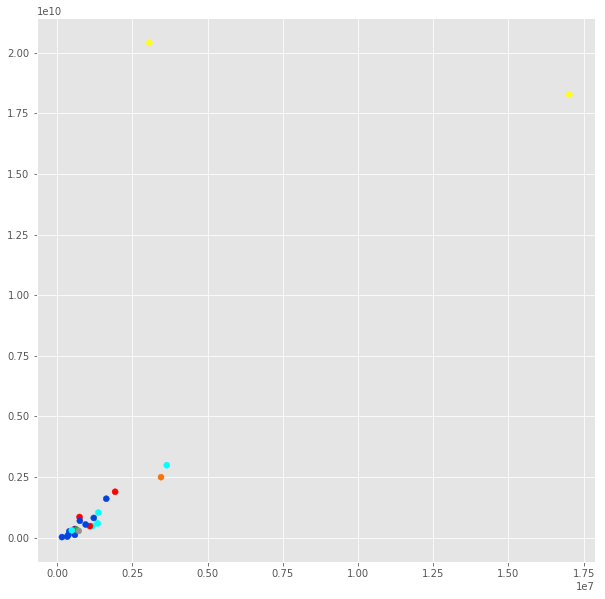

In [106]:
plt.figure(figsize=(10,10))
plt.scatter('población 2017', 'monto', data=substp_porprov2017_copy, color='color list')
plt.show

In [ ]:
#estimacion_de_y = (700000 - (substp_porprov2017_copy['población 2017'].mean()))/np.std(substp_porprov2017_copy['población 2017'])
#correl = substp_porprov2017_copy['monto'].corr(substp_porprov2017_copy['población 2017'])
#correl = correl * estimacion_de_y
#(correl * (np.std(substp_porprov2017_copy['monto'])) + substp_porprov2017_copy['monto'].mean())

In [87]:
slope = np.mean(stsc_subs[:, 1] * stsc_subs[:, 0])*(np.std(substp_porprov2017_copy['monto']/substp_porprov2017_copy['población 2017']))
intercept = np.mean(substp_porprov2017_copy['monto']) - np.mean(slope*substp_porprov2017_copy['población 2017'])

In [91]:
fit = []
for i in np.arange(len(substp_porprov2017_copy)):
    f = slope * substp_porprov2017_copy['población 2017'].loc[i].item() + intercept
    fit = np.append(fit, f)

In [93]:
substp_porprov2017_copy['fitted'] = fit

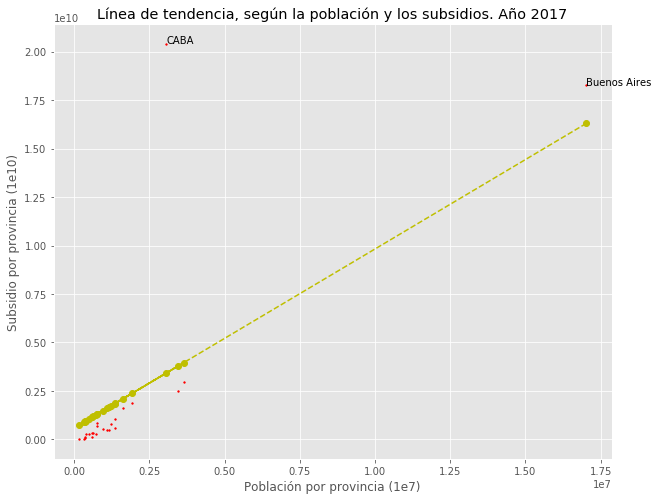

In [112]:
plt.figure(figsize=(10,8))
plt.scatter('población 2017', 'monto', s=3, color='r', data= substp_porprov2017_copy)
plt.plot(substp_porprov2017_copy['población 2017'], substp_porprov2017_copy['fitted'],'go--', c='y')
plt.xlabel("Población por provincia (1e7)")
plt.ylabel("Subsidio por provincia (1e10)")
plt.title('Línea de tendencia, según la población y los subsidios. Año 2017')
plt.annotate('CABA', (substp_porprov2017_copy['población 2017'].loc[1], substp_porprov2017_copy['monto'].loc[1]))
plt.annotate('Buenos Aires', (substp_porprov2017_copy['población 2017'].loc[0], substp_porprov2017_copy['monto'].loc[0]))
#plt.savefig('regressionline.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 864x864 with 0 Axes>

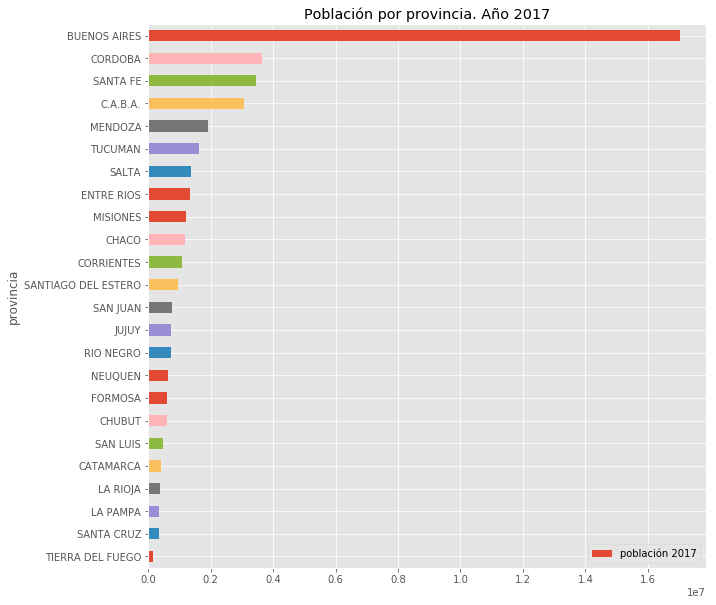

In [115]:
plt.figure(figsize=(12,12))
substp_porprov2017_copy.sort_values(['población 2017'], ascending=True).plot.barh('provincia', 'población 2017', figsize=(10,10), title='Población por provincia. Año 2017', grid=True)
plt.savefig('población 2017.pdf', dpi=200, bbox_inches='tight')